# Laplace equation

Numerical resolution of the Laplace equation:

$$
\frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 p}{\partial y^2} = 0
$$

with given boundary conditions in a rectangular region.

In [1]:
#We'll need these libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

The most advisable numerical scheme is that of central differences. This reflects the fact that the underlying physics are isotropic.

$$
p_{ij} = \frac{\Delta y^2 (p_{i+1,j} + p_{i-1,j}) + \Delta x^2 (p_{i,j+1} + p_{i,j-1})}{2(\Delta x^2 + \Delta y^2)}
$$

The solution to this pentadiagonal linear system can be approximated by iteration.

In [46]:
# Numerical parameters
nx = 40
ny = 40
nit = 2000
dx = 2/(nx - 1)
dy = 1/(ny - 1)

# Grid
xs = np.linspace(0, 2, nx)
ys = np.linspace(0, 1, ny)

# Initial guess
p = np.zeros((nx, ny))

# Boundary conditions
p[0, :] = -np.sin(1*np.pi*ys)
p[-1, :] = np.sin(2*np.pi*ys)
p[:, 0] = 1.0 * xs * (xs - 2)
p[:, -1] = 0

In [47]:
c = 1 / (2 * (dx**2 + dy**2))
for k in range(0, nit):
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            p[i,j] = c * (dy**2 * (p[i+1, j] + p[i-1, j])) + \
                     c * (dx**2 * (p[i, j+1] + p[i, j-1]))

## Visualization

The Laplace equation often models stationary physical phenomena such as:

- Electrostatic fields
- Steady fluid flows
- Steady heat flows

Where the flow is recovered from $p(x, y)$ via a gradient operator:

$\vec f(x, y) = - \vec{\nabla p}$

In [48]:
vy, vx = np.gradient(-p.T)
intensity = (vx**2 + vy**2)**0.5

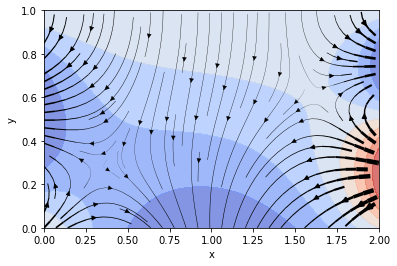

In [49]:
plt.contourf(xs, ys, p.T, cmap='coolwarm', alpha = 0.7);
plt.streamplot(xs, ys, vx, vy, linewidth=5*intensity / intensity.max(), color = 'black', density=1);
plt.xlabel('x');
plt.ylabel('y');